<div style="background-image: url('https://images.unsplash.com/photo-1522742034131-3dca7544197c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=635&q=80'); background-size: 40%; background-repeat: no-repeat; background-position: right;">

# Shifted Rastrigin’s Function

$F_4(x) = \sum_{i=1}^{D}(z_i^2 - 10cos(2 \pi z_{i})+10) + f_{bias_4}$, $ z = x - o $, $x = [x_1,x_2,...,x_D]$

D: dimensions. $o = [o_1, o_2, ..., o_D]$ : the shifted global optimum.

### Properties:
- Multi-modal
- Shifted
- Separable
- Scalable
- Local optima’s number is huge
- Dimension D as 100, 500 and 1000
- $x∈[−5,5]^D$ , Global optimum $x^* = o$ , $F_4(x^*) = f_{bias_4} = - 330$
    </div>

In [1]:
import sys
sys.path.append('../') # just to allow using python files at another directory

import numpy as np
from shifted_go import * # shifted global optimum of the functions
from algorithms import * # optimization algorithms customized
from utils import * # functions used to summarise the results

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pygmo as pg # package with the optimization algorithms
import time
import pandas as pd
from itertools import combinations

## I. Defining the class for the optimization algorithm
<hr>

In [2]:
class shifted_rastrigin:
    
    def __init__(self, dim):
        self.dim = dim
        self.name = 'shifted Rastrigin'

    def fitness(self, x):
        z = np.array(x)
        if z.ndim <= 1:
            if np.isscalar(x) == True:
                z = z - rastrigin[0]
                z = np.sum(z**2 - 10*np.cos(2*np.pi*z) + 10)
            else:
                z = z - rastrigin[:len(z)]
                z = np.sum(z**2 - 10*np.cos(2*np.pi*z) + 10)
        else:  
            z = z - rastrigin[:z.shape[1]]
            z = np.sum(z**2 - 10*np.cos(2*np.pi*z) + 10, axis=1)
        return  [z + f_bias[3]]
    
    def get_bounds(self):
        return ([-5]*self.dim,[5]*self.dim)
    
    def get_nic(self): # number of inequality constraints
        return 0
    
    def get_nec(self): # number of equality constraints
        return 0
    
    def get_name(self): # number of equality constraints
        return self.name + ' - dimension ' + str(self.dim)
    
    def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

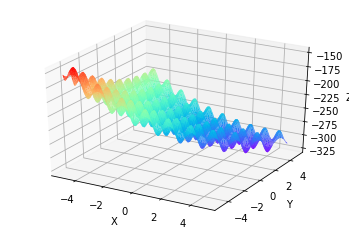

In [3]:
grid = np.array(list(combinations(np.linspace(-5, 5, 100), 2)))
function = shifted_rastrigin(2)
z = function.fitness(grid)
ax = plt.axes(projection='3d')

ax.plot_trisurf(grid[:,0], grid[:,1], np.array(z).flatten(), cmap='rainbow', linewidth=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# II. Optimizing the function using metaheuristics

<hr>

## II.1 Dimension = 50 

The Rastrigin function has several local minima, as CMA-ES calculates recombination amounts to selecting a new mean value for the distribution it might not perform so well on this case. The same for simulated annealing that for being a trajectory algorithm might suffer to reach the minimum. The idea is to use differential evolution .

### Parameters selection

We tested empirically the parameters allowed mutation variants (allowed_variants) and F and CR parameter adaptation scheme to be used (variant_adptv) and the best results were with the following configuration:

- allowed_variants: 10 - rand/2/bin
- variant_adptv: 1 - jDE

In the case of the number of generations we did several trials to find out the solution.

In [4]:
udas = [pg.de1220(gen=100, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09), 
        pg.de1220(gen=200, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09), 
        pg.de1220(gen=500, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09), 
        pg.de1220(gen=1000, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09),
        pg.de1220(gen=1500, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09),
        pg.de1220(gen=2000, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09),
        pg.de1220(gen=2500, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09)]

df = statistics(shifted_rastrigin(50), udas, epochs = 1, pop_size = 25)
df

,parameters,avg computational time (sec),avg function evals,max,min,avg,median
0,"[Generations: 100, Allowed variants: [10], Self adaptation variant: 1, Stopping xtol: 1e-09, Stopping ftol: 1e-09, Memory: false, Verbosity: 1, Seed: 2412496532]",0.003000,2525,158.281237,158.281237,158.281237,158.281237
1,"[Generations: 200, Allowed variants: [10], Self adaptation variant: 1, Stopping xtol: 1e-09, Stopping ftol: 1e-09, Memory: false, Verbosity: 1, Seed: 3119216746]",0.004530,5025,-52.819514,-52.819514,-52.819514,-52.819514
2,"[Generations: 500, Allowed variants: [10], Self adaptation variant: 1, Stopping xtol: 1e-09, Stopping ftol: 1e-09, Memory: false, Verbosity: 1, Seed: 1495923606]",0.011771,12525,-166.523205,-166.523205,-166.523205,-166.523205
3,"[Generations: 1000, Allowed variants: [10], Self adaptation variant: 1, Stopping xtol: 1e-09, Stopping ftol: 1e-09, Memory: false, Verbosity: 1, Seed: 3931352601]",0.024180,25025,-278.138919,-278.138919,-278.138919,-278.138919
4,"[Generations: 1500, Allowed variants: [10], Self adaptation variant: 1, Stopping xtol: 1e-09, Stopping ftol: 1e-09, Memory: false, Verbosity: 1, Seed: 26313293]",0.036037,37525,-319.218678,-319.218678,-319.218678,-319.218678
5,"[Generations: 2000, Allowed variants: [10], Self adaptation variant: 1, Stopping xtol: 1e-09, Stopping ftol: 1e-09, Memory: false, Verbosity: 1, Seed: 2552602825]",0.045993,50025,-323.634896,-323.634896,-323.634896,-323.634896
6,"[Generations: 2500, Allowed variants: [10], Self adaptation variant: 1, Stopping xtol: 1e-09, Stopping ftol: 1e-09, Memory: false, Verbosity: 1, Seed: 3745457912]",0.056570,62525,-328.010082,-328.010082,-328.010082,-328.010082


As we can observe the algorithm needs a high number of generations to converge to the global minimum.

Number of function evaluations:  1531875.0
Final solution vector:  [ 3.84659413  4.32362215 -2.82162977  0.64653814  4.33820184  2.44087002
 -3.45931027  2.33705875  3.97998033  4.29001457  2.37393213  3.22497654
 -0.02357469  4.6273864   4.6134355   0.99472309  1.61013773 -4.72534657
 -2.69746504  1.03554781 -3.20479349  3.80570403 -2.67825391 -3.22904705
  4.41155002  0.71588788 -4.42193782  1.49159438  0.73886501  2.17939209
 -3.2777585   2.78361463  3.59618764 -4.71920157  0.51737221 -3.60436021
 -3.20398417  0.46834603 -2.03018555 -0.39847645 -3.77110798  4.96803423
  4.32144974  3.35468734 -4.86572414  4.83206711  0.21250478 -4.27497787
  3.6840305   4.78742869]
Fitness:  [-330.]
Wall time: 34.9 s


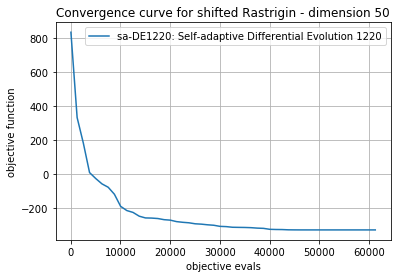

In [5]:
%%time
best = []
fevals = 0
for i in range(25):
    sol = sade(shifted_rastrigin(50), gen=2500, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09, 
               pop_size=25)
    if best == [] or sol['champion solution'] < best['champion solution']:
        best = sol    
    fevals += sol['log'][-1][0]

report_convergence(best, fevals)

<hr>

## II.2 Dimension = 500

For the same reasons explained for dimension 50 we are going to use differential evolution to optimize rastrigin in dimension 500.

### Parameters selection

As it is a complex function a huge number of generations is needed to find the best solution, we also need to check how the population size improves the performance at different configurations. We've done some experiments as shown below:

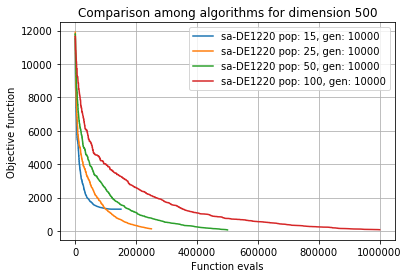

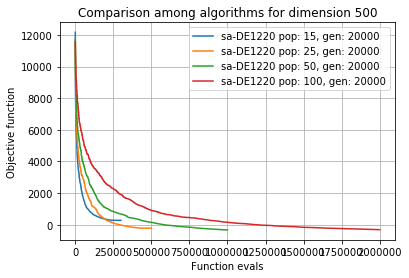

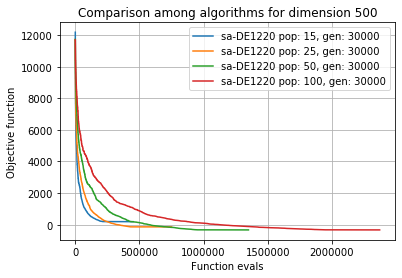

In [7]:
prob = pg.problem(shifted_rastrigin(500))
stats = []

populations = [15, 25, 50, 100, 15, 25, 50, 100, 15, 25, 50, 100]
generations = [10000, 10000, 10000, 10000, 20000, 20000, 20000, 20000, 30000, 30000, 30000, 30000]
ctr = ''

fig = plt.figure()
for gen, pop_size in zip(generations, populations): 
    logs = []
    best = []
    evals = []
    start_time = time.time()
    algo = pg.algorithm(pg.de1220(gen=gen, allowed_variants=[10], variant_adptv=1, 
                                       ftol=1e-09, xtol=1e-09))
    algo.set_verbosity(1) # regulates both screen and log verbosity
    pop = pg.population(prob, pop_size)
    sol = algo.evolve(pop)
    logs.append(algo.extract(pg.de1220).get_log())
    best.append(sol.champion_f)
    evals.append(sol.problem.get_fevals())
    
    end_time = time.time()
    logs = np.array(logs)
    stats.append(['population: '+ str(pop_size) + ', generations: '+str(gen), (end_time-start_time)/25, np.mean(np.array(evals)), np.max(np.array(best)), 
                    np.min(np.array(best)), np.mean(np.array(best)), np.median(np.array(best))])
    avg_log = np.average(logs,0)
    plt.plot(avg_log[:,1],avg_log[:,2] , label=algo.get_name().split(':')[0] + ' pop: '+ str(pop_size) + ', gen: '+str(gen))
    if ctr == '':
        ctr = gen
    elif pop_size ==100:
        ctr = gen
        plt.title('Comparison among algorithms for dimension ' + str(prob.get_nx()))
        plt.xlabel('Function evals')
        plt.ylabel('Objective function')
        plt.legend() 
        plt.grid() 
        plt.show()

In [8]:
df_stats = pd.DataFrame(stats, columns=['parameters', 'avg computational time (sec)', 'avg function evals' , 
                                        'max', 'min', 'avg', 'median'])
df_stats

,parameters,avg computational time (sec),avg function evals,max,min,avg,median
0,"population: 15, generations: 10000",0.312198,150015.0,1305.412654,1305.412654,1305.412654,1305.412654
1,"population: 25, generations: 10000",0.513704,250025.0,130.555567,130.555567,130.555567,130.555567
2,"population: 50, generations: 10000",1.047348,500050.0,63.908122,63.908122,63.908122,63.908122
3,"population: 100, generations: 10000",2.072004,1000100.0,76.546081,76.546081,76.546081,76.546081
4,"population: 15, generations: 20000",0.633846,300015.0,276.039126,276.039126,276.039126,276.039126
5,"population: 25, generations: 20000",1.020430,500025.0,-222.520546,-222.520546,-222.520546,-222.520546
6,"population: 50, generations: 20000",2.050144,1000050.0,-329.721298,-329.721298,-329.721298,-329.721298
7,"population: 100, generations: 20000",4.147120,2000100.0,-315.965301,-315.965301,-315.965301,-315.965301
8,"population: 15, generations: 30000",0.981479,450015.0,192.395280,192.395280,192.395280,192.395280
9,"population: 25, generations: 30000",1.594073,750025.0,-136.975771,-136.975771,-136.975771,-136.975771


The best result was obtained with 30000 generations and a population of 50 individuals.

Number of function evaluations:  33953750.0
Final solution vector:  [ 3.84659425  4.32362184 -2.8216292   0.64653823  4.33820199  2.44087003
 -3.45931003  2.33705857  3.97998052  4.2900143   2.37393215  3.22497678
 -0.02357456  4.62738601  4.61343545  0.99472279  1.61013782 -4.72534643
 -2.69746519  1.0355479  -3.20479339  3.80570375 -2.67825392 -3.22904617
  4.41155045  0.71588768 -4.42193754  1.49159439  0.73886514  2.17939204
 -3.27775791  2.78361469  3.59618764 -4.71920146  0.51737197 -3.60436019
 -3.20398377  0.46834594 -2.03018575 -0.39847587 -3.77110761  4.96803421
  4.32144996  3.35468717 -4.86572412  4.83206701  0.21250436 -4.27497781
  3.68403076  4.78742875 -4.0843067   3.42023713 -2.35468339  1.24216793
  0.48673784 -2.25401851 -3.34869945  2.67696968 -0.52956979 -3.83108822
  3.02184161 -3.09146216  4.19477269 -1.34881217  3.46887859  3.0658052
  0.26927427 -1.12314379  2.34127036  0.2862914   2.42005455  3.49876046
  1.38995779  0.11681844 -4.6781234  -2.17060401  4.15902

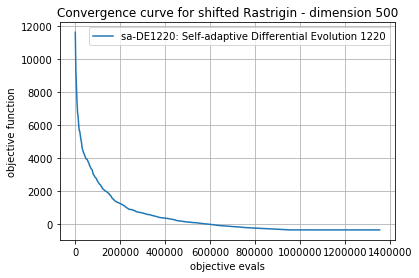

In [9]:
%%time
best = []
fevals = 0
for i in range(25):
    sol = sade(shifted_rastrigin(500), gen=30000, allowed_variants=[10], variant_adptv=1, ftol=1e-09, xtol=1e-09, 
               pop_size=50)
    if best == [] or sol['champion solution'] < best['champion solution']:
        best = sol    
    fevals += sol['log'][-1][0]

report_convergence(best, fevals)